# Exercice - Machine Learning pour l'analysis de sentiment

Dans ce notebook, nous allons entraîner et évaluer un classifieur afin de prédire le sentiment de critiques de films sur la plateforme iMDb. C'est un cas d'école classique permettant d'aborder les thématique de la _classification binaire_ et du _traitement automatique des langues_ (_NLP_) de façon ludique.

Jeu de données :
- Source : https://ai.stanford.edu/~amaas/data/sentiment/
- CSV : https://github.com/Ankit152/IMDB-sentiment-analysis/raw/master/IMDB-Dataset.csv

In [1]:
import pandas

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

## Préparation du jeu de données

Préparons notre jeu de données :

1. Extraction
2. Séparation d'un jeu d'entraînement et d'un jeu de test
3. Analyse rapide

In [2]:
dataset_url = "https://github.com/Ankit152/IMDB-sentiment-analysis/raw/master/IMDB-Dataset.csv"
dataset = pandas.read_csv(dataset_url)
train_dataset, test_dataset = train_test_split(dataset, random_state=42)

In [3]:
train_dataset.head()

,review,sentiment
27434,"I figure this to be an ""alternate reality"" tee...",negative
13400,This is the kind of movie that wants to be goo...,negative
883,This was by far the worst movie I've ever seen...,negative
7303,"Awful, awful, awful...<br /><br />I loved the ...",negative
45124,"Fragile Carne, just before his great period. A...",positive


In [4]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37500 entries, 27434 to 15795
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     37500 non-null  object
 1   sentiment  37500 non-null  object
dtypes: object(2)
memory usage: 878.9+ KB


## Extraction de caractéristiques

Les algorithmes de machine learning ne fonctionnent qu'avec des valeurs numériques. Or lorsque notre problème considéré relève du NLP, nous n'avons à notre disposition uniquement des chaînes de caractères. Afin de pouvoir extraire des _caractéristiques_ (_features_) numériques, voici la marche à suivre :

1. _Tokenisation_ : transformer les phrases en _tokens_ / _symboles_ (par exemple en découpant par mots)
2. _Vectorisation_ : transformer les _tokens_ en valeurs numériques (par exemple avec un _bag-of-words_ pour compter la fréquence de chaque _token_)

La bibliothèque `scikit-learn` fournit le vectoriseur `CountVectorizer` permettant de tokeniser puis d'appliquer une vectorisation de type _bag-of-words_ (compte la fréquence des mots et ne garde que les N plus fréquents) :

In [5]:
bow = CountVectorizer(analyzer="word", max_features=1000)
bow.fit(train_dataset["review"])

CountVectorizer(max_features=1000)

On peut observer le dictionnaire construit par le vectoriseur, avec pour chaque token identifié la fréquence associée :

In [6]:
bow.vocabulary_

{'figure': 306,
 'this': 861,
 'to': 872,
 'be': 77,
 'an': 40,
 'reality': 687,
 'flick': 318,
 'more': 550,
 'type': 897,
 'character': 139,
 'as': 57,
 'the': 846,
 'of': 593,
 'know': 461,
 'it': 437,
 'not': 584,
 'meant': 528,
 'at': 59,
 'least': 476,
 'in': 423,
 'way': 938,
 'but': 120,
 'will': 961,
 'none': 582,
 'less': 481,
 'br': 109,
 'line': 488,
 'away': 67,
 'from': 333,
 'even': 262,
 'being': 90,
 'classic': 150,
 'is': 434,
 'though': 863,
 'only': 605,
 'if': 419,
 'you': 995,
 're': 682,
 'expecting': 276,
 'very': 916,
 'much': 559,
 'that': 845,
 'said': 717,
 'main': 509,
 'has': 379,
 'some': 780,
 'premise': 665,
 'because': 81,
 'writing': 987,
 'just': 448,
 'isn': 436,
 'movie': 555,
 'did': 200,
 'enough': 253,
 'laughs': 471,
 'or': 609,
 'keep': 449,
 'my': 564,
 'interest': 429,
 'watching': 936,
 'with': 964,
 'see': 736,
 'anything': 47,
 'didn': 201,
 'so': 778,
 'wouldn': 983,
 'recommend': 692,
 'seems': 740,
 'odd': 592,
 'she': 757,
 'truly': 8

Appliquons la transformation à notre jeu de données :

In [7]:
X_train = bow.transform(train_dataset["review"]).toarray()
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Entrainement d'un modèle

Notre jeu de données d'entrainement est prêt, nous pouvons passer à l'entrainement d'un modèle.

In [8]:
y_train = train_dataset["sentiment"]
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

## Evaluation d'un modèle

Une fois l'entraînement d'un modèle effectué, il convient d'évaluer ses performance. Notre problème est de type classification binaire, nous pouvons utiliser les outils d'évaluation suivants (liste non-exhaustive) :
- Visualisation : matrice de confusion
- Métriques : justesse (_accuracy_), f1-score, précision, rappel (_recall_)

Commençons par préparer le jeu de test **avec strictement les même traitements que le jeu d'entraînement** puis effectuer les prédictions sur le jeu de test :

In [9]:
X_test = bow.transform(test_dataset["review"])
y_test = test_dataset["sentiment"]
y_pred = lr.predict(X_test)

Affichons la matrice de confusion du modèle :

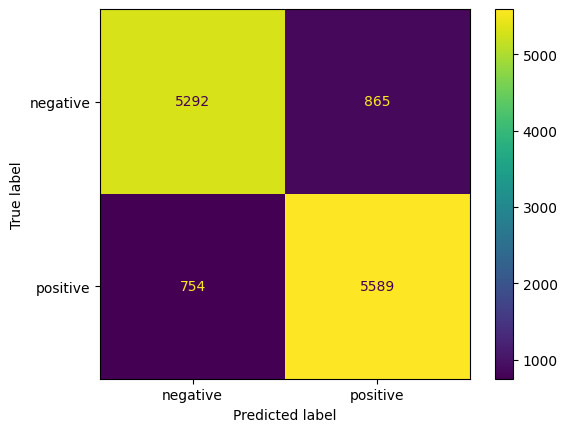

In [10]:
cm = confusion_matrix(y_test, y_pred, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
_ = disp.plot()

Enfin, nous pouvons décortiquer la matrice de confusion avec les métriques de classification :

In [11]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.88      0.86      0.87      6157
    positive       0.87      0.88      0.87      6343

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



## Effectuer des prédictions

Nous pouvons utiliser le modèle entraîné pour effectuer des prédictions :

In [12]:
review = "Had a great time"
processed_review = bow.transform([review])
lr.predict(processed_review)

array(['positive'], dtype=object)

In [13]:
review = "I hate this movie"
processed_review = bow.transform([review])
lr.predict(processed_review)

array(['positive'], dtype=object)

Nous pouvons également observer les limites du modèle actuel :

In [14]:
review = "I love this movie"
processed_review = bow.transform([review])
lr.predict(processed_review)

array(['positive'], dtype=object)

Voici un petit programme interactif permettant de générer des prédictions de sentiments dynamiques :

In [15]:
review = input("Review: ")
processed_review = bow.transform([review])
predictions = lr.predict(processed_review)
print(predictions[0])

positive


## Question

Le modèle actuel fonctionne mais avec une performance modérée : il est meilleur qu'un aléatoire mais il peut facilement se tromper dans ses prédictions :
- D'après-vous, le modèle est-il en _sous-apprentissage_ (_underfitting_) ou _sur-apprentissage_ (_overfitting_) ?
- Pourquoi ?

## Pour aller plus loin

Si vous souhaitez aller plus loin, voici des pistes d'amélioration :

- (facile) Augmenter la taille du dictionnaire du vectoriseur _bag-of-words_
- (facile) Changer le vectoriseur par un TF-IDF
- (intermédiaire) Changer le modèle par un SVM / un arbre de décision / une forêt aléatoire et comparer les résultats
- (intermédiaire) Analyser et nettoyer le jeu de données source afin de ne garder uniquement les termes pertinents et ne pas fausser les modèles
- (avancé) Effectuer une recherche d'hyper-paramètres afin d'optimiser au mieux un modèle
- (avancé) Refactorer le code en utilisant la notion de _pipeline_ afin de ne pas avoir à ré-effectuer les traitement pour chaque jeu de données